In [1]:
# Data handling and computation
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Data preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Model selection and validation
from sklearn.model_selection import train_test_split, cross_val_score

# Pipeline library for efficient workflow
from sklearn.pipeline import Pipeline

# Metrics libraries for evaluating model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, classification_report, roc_curve, auc, accuracy_score
from sklearn import metrics

In [2]:
# Read in data locally
# df = pd.read_csv('data/airbnb_data.csv')
# pd.set_option('display.max_columns', None)

# Read in data using google colab/drive
df = pd.read_csv('/content/drive/MyDrive/Flatiron/capstone/airbnb_data.csv')
pd.set_option('display.max_columns', None)

In [14]:
numerical_features = df.select_dtypes('number')
categorical_features = df.select_dtypes('object')
datetime_features = df.select_dtypes('datetime')

print(f"Numerical columns: \n{list(numerical_features.columns)}\n")
print(f"Categorical columns: \n{list(categorical_features.columns)}\n")
print(f"Datetime columns: \n{list(datetime_features.columns)}")

Numerical columns: 
['id', 'host_response_rate', 'host_has_profile_pic', 'host_identity_verified', 'latitude', 'longitude', 'guest_limit', 'bathrooms', 'bedrooms', 'beds', 'price', 'minimum_nights', 'availability_365', 'number_of_reviews', 'rating', 'instant_bookable', 'strict_cancel_policy', 'host_tenure_before_2016', 'good_overall_rating', 'avg_ratings_per_year', 'expensive']

Categorical columns: 
['name', 'description', 'transit', 'neighborhood', 'city', 'property_type', 'room_type', 'amenities', 'cancellation_policy']

Datetime columns: 
['host_since', 'first_review', 'last_review']


## Feature Map

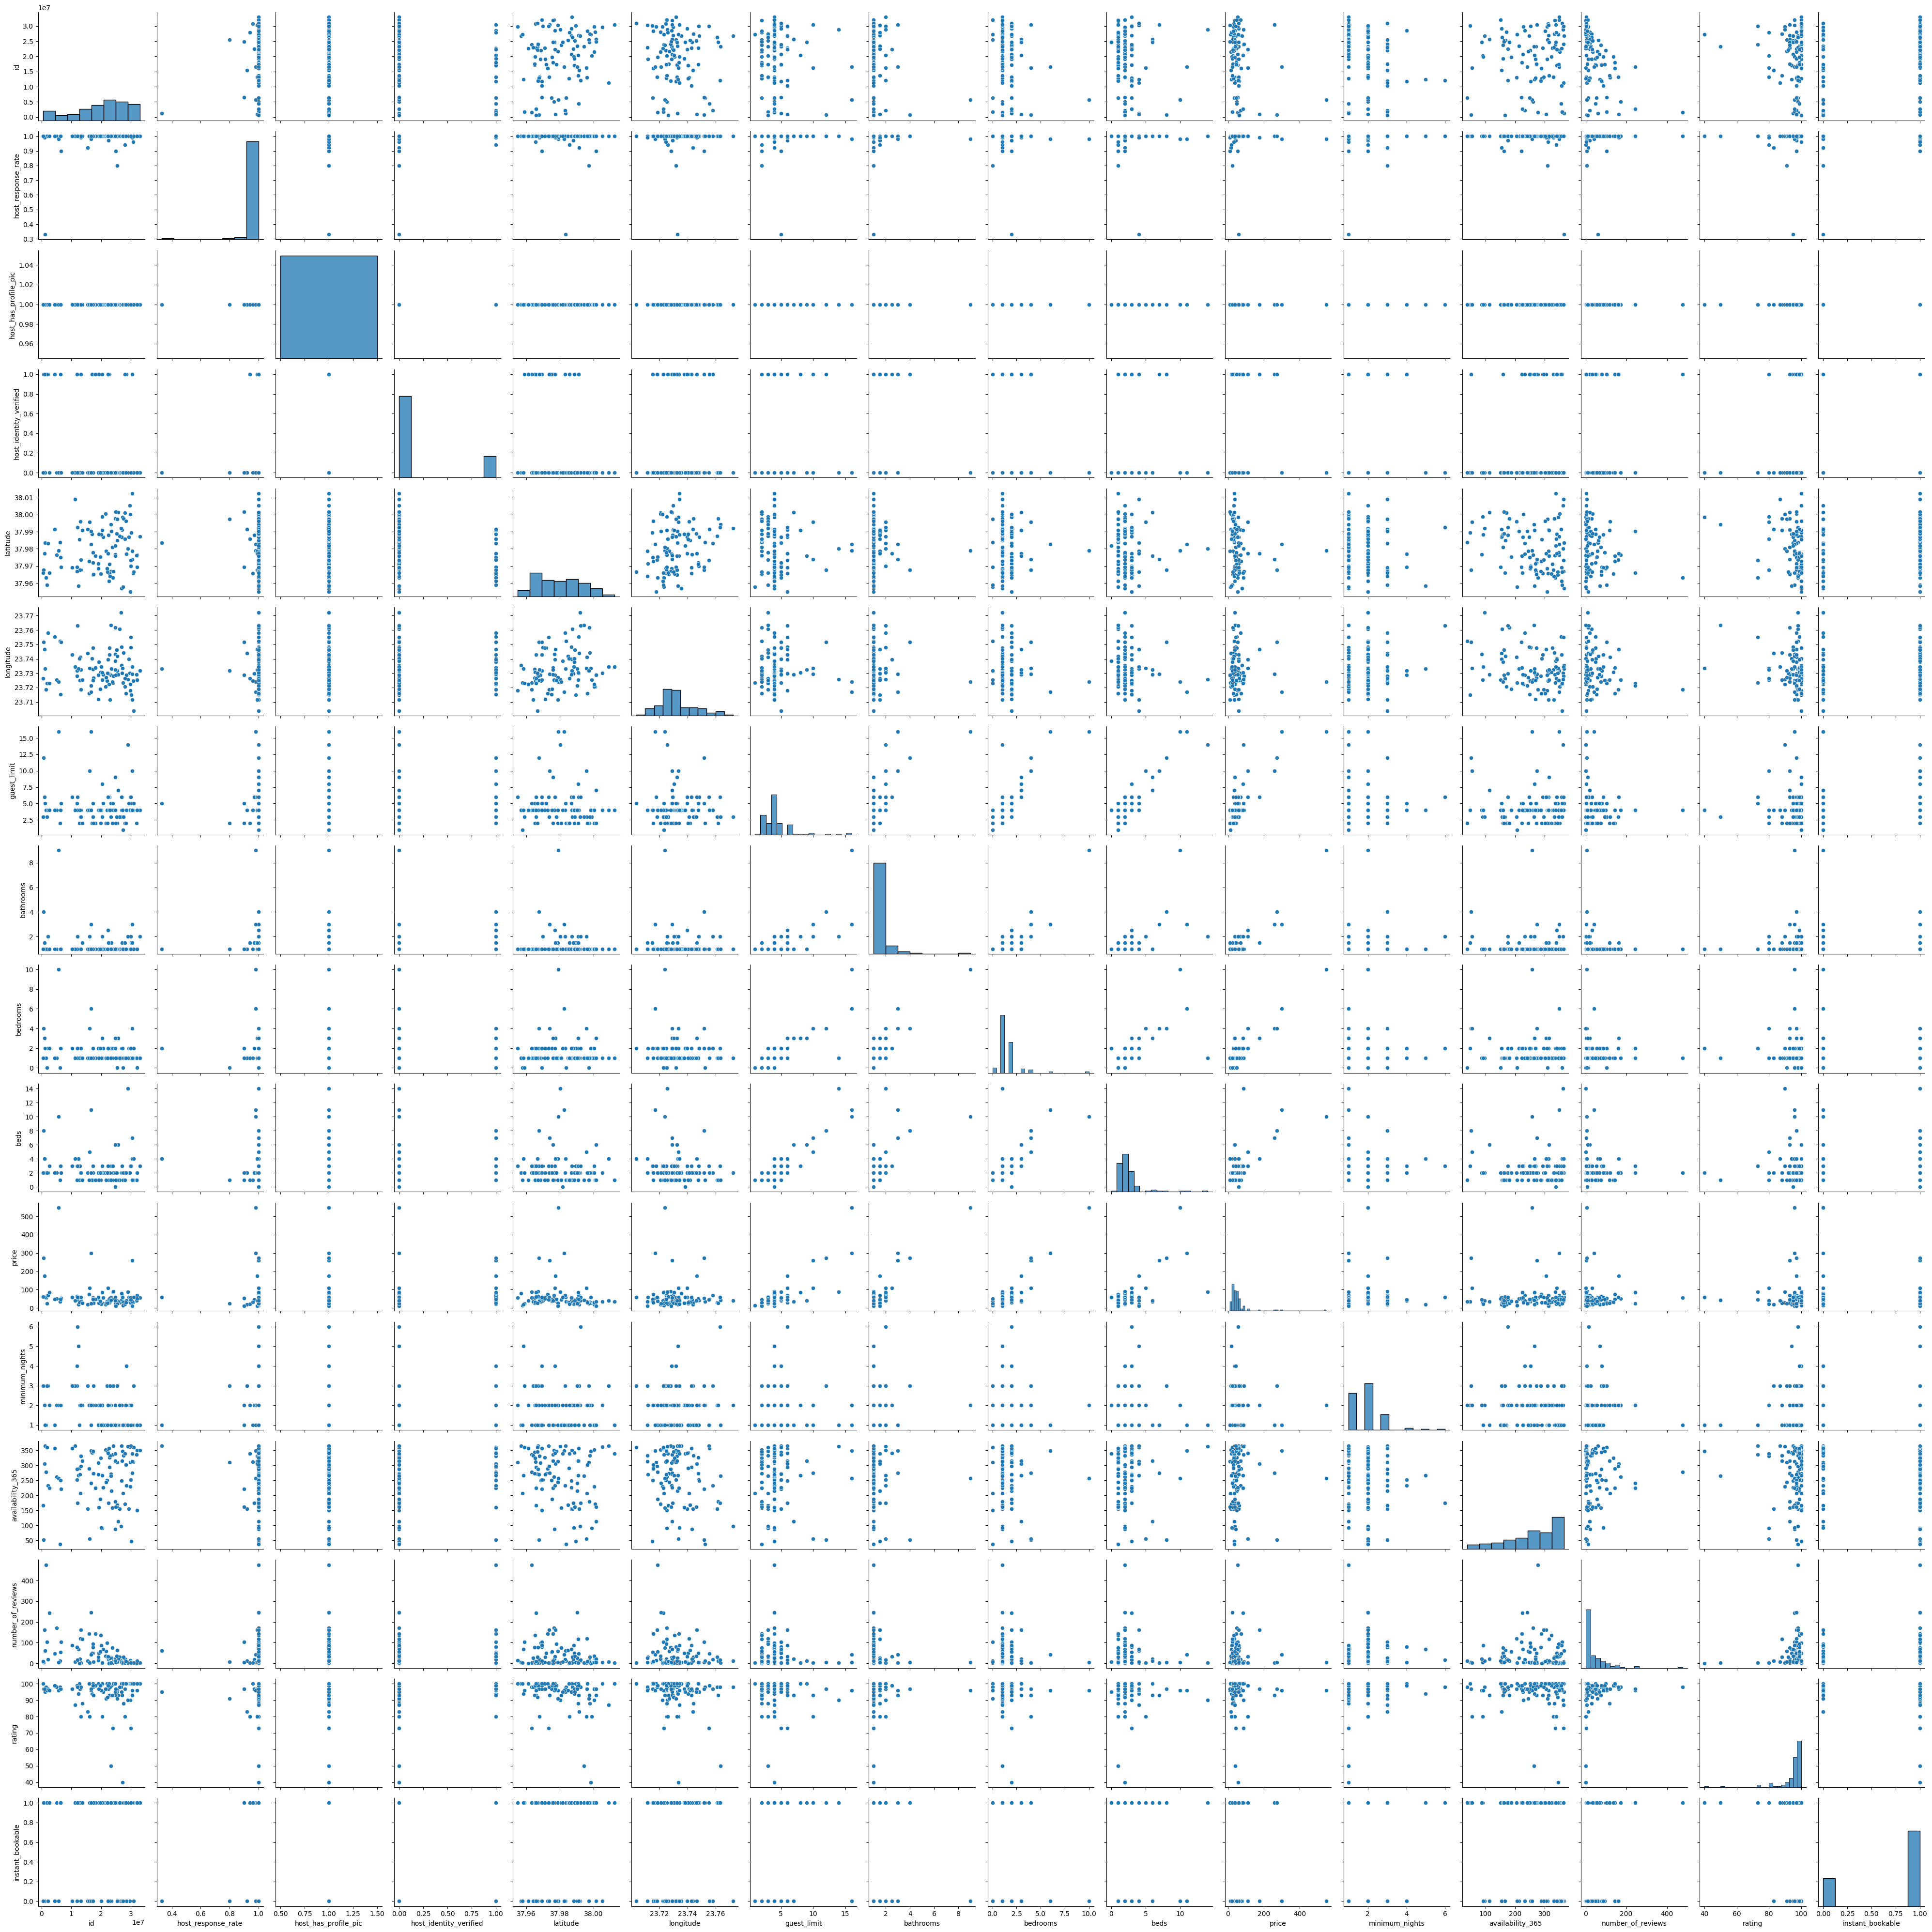

In [ ]:
sns.pairplot(df.sample(n=100), height=2.5)
plt.tight_layout()

## EDA

In [15]:
df.head()

,id,name,description,transit,host_since,host_response_rate,host_has_profile_pic,host_identity_verified,neighborhood,city,latitude,longitude,property_type,room_type,guest_limit,bathrooms,bedrooms,beds,amenities,price,minimum_nights,availability_365,number_of_reviews,first_review,last_review,rating,instant_bookable,cancellation_policy,strict_cancel_policy,host_tenure_before_2016,good_overall_rating,avg_ratings_per_year,expensive
0,10595,"96m2, 3br, 2ba, metro, wi-fi etc...",athens furnished apartment no6 is 3-bedroom ap...,note: 5-day ticket for all the public transpor...,2009-09-08,1.0,1,1,ambelokipi,athens,37.988879,23.764315,apartment,entire home/apt,8.0,2.0,3.0,5.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",71.0,1,294,17,2011-05-20,2019-01-12,96.0,1,strict,2,1,1,2.222351,1
2,10990,"50m2, metro, wi-fi, cabletv, more",athens furnished apartment no3 is 1-bedroom ap...,note: 5-day ticket for all the public transpor...,2009-09-08,1.0,1,1,ambelokipi,athens,37.987834,23.764787,apartment,entire home/apt,4.0,1.0,1.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",47.0,1,282,27,2012-09-06,2019-02-01,97.0,1,strict,2,1,1,4.216225,0
3,10993,"studio, metro, cable tv, wi-fi, etc",the studio is an -excellent located -close t...,note: 5-day ticket for all the public transpor...,2009-09-08,1.0,1,1,ambelokipi,athens,37.988607,23.764222,apartment,entire home/apt,2.0,1.0,0.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",37.0,1,286,42,2012-09-24,2019-02-02,97.0,1,strict,2,1,1,6.606589,0
4,10995,"47m2, close to metro,cable tv,wi-fi",aqa no2 is 1-bedroom apartment (47m2) -excell...,note: 5-day ticket for all the public transpor...,2009-09-08,1.0,1,1,ambelokipi,athens,37.989498,23.763562,apartment,entire home/apt,4.0,1.0,1.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",47.0,2,308,16,2010-07-08,2019-01-11,95.0,1,strict,2,1,1,1.879704,0
5,27262,"54m2, 1-br, cable tv, wi-fi, metro",big 1-bedroom apartment that can accommodate 4...,NaN,2009-09-08,1.0,1,1,ambelokipi,athens,37.988928,23.764749,apartment,entire home/apt,4.0,1.0,1.0,1.0,"{tv,""cable tv"",internet,wifi,""air conditioning...",47.0,1,283,16,2012-09-21,2017-05-15,95.0,1,strict,2,1,1,3.443724,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18980 entries, 0 to 28043
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   id                       18980 non-null  int64         
 1   name                     18980 non-null  object        
 2   description              18980 non-null  object        
 3   transit                  14569 non-null  object        
 4   host_since               18980 non-null  datetime64[ns]
 5   host_response_rate       17496 non-null  float64       
 6   host_has_profile_pic     18980 non-null  int64         
 7   host_identity_verified   18980 non-null  int64         
 8   neighborhood             18980 non-null  object        
 9   city                     18980 non-null  object        
 10  latitude                 18980 non-null  float64       
 11  longitude                18980 non-null  float64       
 12  property_type            18980 n

In [6]:
df.isna().sum()[lambda x: x > 0]

name                        30
description                289
transit                   8910
host_since                   2
host_response_rate        5055
host_has_profile_pic         2
host_identity_verified       2
neighbourhood              261
city                         9
zipcode                    918
bedrooms                    12
beds                        31
first_review              6722
last_review               6722
review_scores_rating      6917
dtype: int64

In [8]:
'''
Should I fill missing values with mean????
'''

#df['host_response_rate'].mean()

'\nShould I fill missing values with mean????\n'

In [9]:
# use this???

df["description"].explode()

0        Athens Furnished Apartment No6 is 3-bedroom ap...
1        Athens Furnished Apartment No4 is 2-bedroom ap...
2        Athens Furnished Apartment No3 is 1-bedroom ap...
3        The Studio is an  -excellent located  -close t...
4        AQA No2 is 1-bedroom apartment (47m2)  -excell...
                               ...                        
28117    "Athens 33" is a newly renovated building in N...
28118    Newly renovated, this two bedroom apartment is...
28119    Athens 21 is centrally located right next to M...
28120    "Athens 33" is a newly renovated building in N...
28121              Beautiful and modern Pagkrati Apartment
Name: description, Length: 28122, dtype: object

## Data Cleaning

In [ ]:
# Columns to drop
cols_to_drop = ['zipcode', 'month', 'bed_type'
               ]
df.drop(columns=cols_to_drop, inplace=True)


# Cleaning column names
col_name_changed = {'neighbourhood': 'neighborhood',
                    'accommodates': 'guest_limit',
                    'review_scores_rating': 'rating'
                    }
df.rename(columns=col_name_changed, inplace=True)


# Formating all data to lowercase
df = df.applymap(lambda s:s.lower() if type(s) == str else s)


# Dropping rows with missing values in each column
cols_w_missing_rows = ['host_identity_verified', 'host_has_profile_pic',
                      'host_since', 'city', 'bedrooms', 'name', 'beds',
                      'description', 'neighborhood', 'rating'
                      ]
df.dropna(subset=cols_w_missing_rows, inplace=True)


# Column value conversion
cols_to_convert = ['host_has_profile_pic', 'host_identity_verified',
                   'instant_bookable'
                  ]
df[cols_to_convert] = df[cols_to_convert].replace({'t': 1, 'f': 0})


# Renaming the values in 'property_type' column
property_rename = {
    'apartment': 'apartment', 'house': 'house', 'loft': 'apartment',
    'serviced apartment': 'apartment', 'condominium': 'apartment',
    'aparthotel': 'hotel', 'boutique hotel': 'hotel', 'bed and breakfast': 'bed and breakfast',
    'townhouse': 'house', 'villa': 'villa', 'guest suite': 'guest suite',
    'guesthouse': 'guesthouse', 'hostel': 'hostel', 'other': 'other',
    'hotel': 'hotel', 'earth house': 'house', 'boat': 'boat', 'resort': 'resort',
    'cycladic house (greece)': 'house', 'cave': 'other', 'tiny house': 'house',
    'camper/rv': 'rv', 'cabin': 'cabin', 'cottage': 'house'
                  }
df['property_type'] = df['property_type'].map(property_rename)


# Convert to daytime
daytime_cols = ['host_since', 'first_review', 'last_review']
for col in daytime_cols:
  df[col] = pd.to_datetime(df[col])


# Convert columns to float and drop special characters
df['host_response_rate'] = df['host_response_rate'].str.replace('%', '').astype('float') / 100
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['guest_limit'] = df['guest_limit'].astype(float)

# Replace hyper-specific values
df.loc[(df['cancellation_policy'] != 'moderate') & (df['cancellation_policy'] != 'flexible'), 'cancellation_policy'] = 'strict'



## Data Filtering

In [12]:
# Filter to only hosts with profile pictures
df = df[(df['host_has_profile_pic'] == 1) &
        (df['room_type'] != 'shared room') &
        (df['guest_limit'] <= 16) &
        (df['minimum_nights'] <= 30) &
        (df['availability_365'] >= 30) &
        (df['property_type'] != 'other')
        ]



## Feature Engienering

In [13]:
# Creating column 'strict_cancel_policy'
df['strict_cancel_policy'] = df['cancellation_policy'].apply(lambda x: 0 if x == 'flexible' else 1 if x == 'moderate' else 2)

# Create binary column named 'host_experience_level'
cutoff_date = pd.to_datetime('2016-01-01')
df['host_tenure_before_2016'] = df['host_since'].apply(lambda x: 1 if x < cutoff_date else 0)

# Create binary column names 'good_rating'
df['good_overall_rating'] = df['rating'].apply(lambda x: 1 if x > 90 else 0)

# Calculate the average number of ratings per year
df['avg_ratings_per_year'] = df['number_of_reviews'] / ((df['last_review'] - df['first_review']).dt.days / 365.25 + np.where((df['last_review'] - df['first_review']).dt.days == 0, 1, 0))

# Create binary column 'expensive'
df['expensive'] = df['price'].apply(lambda x: 1 if x > df['price'].mean() else 0)




<ipython-input-13-8a1616e565d5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['strict_cancel_policy'] = df['cancellation_policy'].apply(lambda x: 0 if x == 'flexible' else 1 if x == 'moderate' else 2)
<ipython-input-13-8a1616e565d5>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['host_tenure_before_2016'] = df['host_since'].apply(lambda x: 1 if x < cutoff_date else 0)
<ipython-input-13-8a1616e565d5>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

## T Test, Annova, etc:
https://chat.openai.com/share/d65ac935-6d39-49db-bda1-b52fbd2d57c8